In [17]:
import os
import sys
os.getcwd()

'/Users/claudio/Documents/GitHub/complex_networks/PROJECT/draft_assignment_2'

In [18]:
import math
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy
import csv
import pandas as pd

In [19]:
# Import class dataset csv
with open("classmates_AdjMatrix.csv") as infile:
    df = pd.read_csv(infile)

np_adj = np.matrix(df)
#print(type(np_adj))
#print(np_adj[1:20])
print(df)

                        Paolo Didier Alfano  Simone Appella  Edoardo Arnaudo  \
Paolo Didier Alfano                       0               1                1   
Simone Appella                            0               0                1   
Edoardo Arnaudo                           1               1                0   
Enrico Maria Belliardo                    0               1                0   
Claudia Berloco                           0               0                0   
Samuele Bertaina                          0               1                0   
Lorenzo Bosio                             1               0                2   
Andrea Bragagnolo                         1               0                2   
Daniele Brun                              0               0                1   
Francesco Carli                           0               2                0   
Fabio Carretto                            0               0                2   
Antonio Carriero                        

In [20]:
# Import class dataset csv
with open("classmates_AdjMatrix_NA.csv") as infile:
    df_NA = pd.read_csv(infile)

np_adj_NA = np.matrix(df_NA)
#print(type(np_adj_NA))
#print(np_adj_NA)

In [21]:
DG = nx.from_numpy_matrix(np_adj, create_using=nx.DiGraph())

print(nx.info(DG))

conv_matr = nx.convert_matrix.to_numpy_matrix(DG)
#print(conv_matr[1:20])

Name: 
Type: DiGraph
Number of nodes: 50
Number of edges: 711
Average in degree:  14.2200
Average out degree:  14.2200


[('Paolo Didier Alfano', {}), ('Simone Appella', {}), ('Edoardo Arnaudo', {}), ('Enrico Maria Belliardo', {}), ('Claudia Berloco', {}), ('Samuele Bertaina', {}), ('Lorenzo Bosio', {}), ('Andrea Bragagnolo', {}), ('Daniele Brun', {}), ('Francesco Carli', {}), ('Fabio Carretto', {}), ('Antonio Carriero', {}), ('Michele Castrovilli', {}), ('Francesco Cerrato', {}), ('Luca Cocchetti', {}), ('Gabriele Cucinelli', {}), ('Luca De Carne', {}), ('Leandro Delgado', {}), ('Dario Delle Vedove', {}), ('Matteo Di Cunzolo', {}), ('Fabrizio Di Priamo', {}), ('Madeleine Duretete', {}), ('Nicolò Ferretti', {}), ('Mario Ferrulli', {}), ('Gianmarco Izzi', {}), ('Fabio Loche', {}), ('Chiara Madeddu', {}), ('Daniele Maronese', {}), ('Kate May', {}), ('Stefano Mazza', {}), ('Michel Miegge', {}), ('Manuel Monaco', {}), ('Marco Murtinu', {}), ('Leonardo Neves Pinto', {}), ('Luis Olimpio', {}), ('Vanessa Orani', {}), ('Eleonora Pennetta', {}), ('Matteo Petrosino', {}), ('Sara Pezzuolo', {}), ('Riccardo Pollo', 

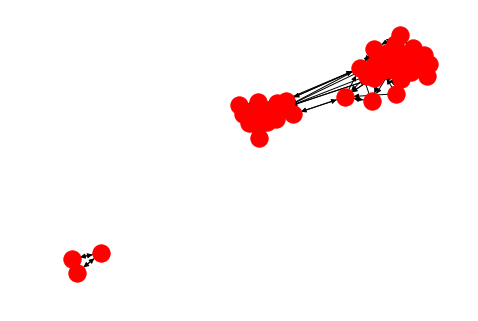

In [32]:
DG_NA = nx.from_numpy_matrix(np_adj_NA, create_using=nx.DiGraph())

#print(df_NA)

DG2 = nx.DiGraph(df_NA)
print(DG2.nodes(data=True))
nx.draw(DG2)

conv_matr_NA = nx.convert_matrix.to_numpy_matrix(DG_NA)
#print(conv_matr_NA[1:20])

#print((conv_matr == conv_matr_NA)[30:50])
print(DG2.edges(data=True))

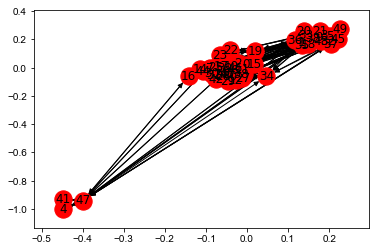

In [7]:
nx.draw_networkx(DG)

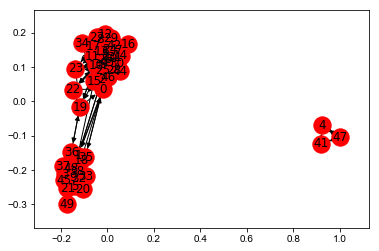

In [8]:
nx.draw_networkx(DG_NA)

In [9]:
nx.write_graphml(DG,'class.graphml', prettyprint = True)

In [10]:
nx.write_graphml(DG_NA,'class_clean.graphml', prettyprint = True)

In [33]:
nx.write_graphml(DG2, 'class_clean_names.graphml', prettyprint = True)

/Users/claudio/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


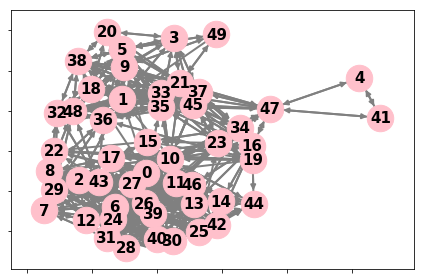

In [11]:
from networkx.drawing.nx_agraph import graphviz_layout

_, plot = plt.subplots()
pos = graphviz_layout(DG)
nx.draw_networkx(DG, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plot)
dzcnapy.plot("class-graphviz")

/Users/claudio/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


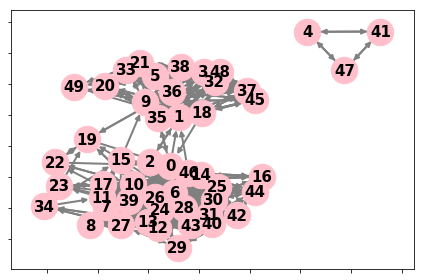

In [12]:
_, plot = plt.subplots()
pos = graphviz_layout(DG_NA)
nx.draw_networkx(DG_NA, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plot)
dzcnapy.plot("class_clean-graphviz")

In [13]:
# https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.DiGraph.degree.html?highlight=degree#networkx.DiGraph.degree
# Note that computing in_degree and out_degree, the average is the same as the average degree. Is it always symmetric?
l_degree = list(DG_NA.degree())
tot = 0
for t in l_degree:
    x, y = t  # x: node number, y: degree (in+out) 
    tot = tot + y/2  # OK, but why half degree?

avg_degree = tot/50
avg_degree

11.94